In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Introduction to Engineering Dynamics
## Newtonian Mechanics

There are three laws that define _Newtonian Mechanics_: 
1. An object at rest will stay at rest and an object in motion will remain in motion unless acted upon by an external force $\sum\mathbf{F}=\mathbf{0}$ and $\sum\mathbf{M} = \mathbf{0}$
2. The change in momentum of a body is proportional to the force applied, $\sum \mathbf{F} = \frac{d}{dt}\left(m\mathbf{v}\right)$ and $\sum\mathbf{M} = \frac{d}{dt}\left(\mathbf{h}\right)$
3. For every applied force, there is an equal and opposite reaction force

The first law defines the study of static structures and objects that are moving slowly or have negligible momentum, $m\mathbf{v}$. In order to keep a bridge, building, or road from moving, the total applied force $\mathbf{F}$ and moments $\mathbf{M}$ must be equal to $\mathbf{0}$. 

$\left[\begin{matrix}
\sum F_x\\
\sum F_y\\
\sum M_z
\end{matrix}\right] =
\left[\begin{matrix}
P_{x}\\
P_{y} + R_{y} - W_{P} - g m\\
L R_{y} - \frac{L g m}{2} - W_{P} x
\end{matrix}\right] =
\left[\begin{matrix}
0\\ 0\\ 0\\
\end{matrix}\right]$

In [2]:
import sympy

In [37]:

sympy.var('m, g, P_x, P_y, R_y, W_P, L, x')

Fx = P_x
Fy = P_y + R_y - W_P - m*g
Mz = -L/2*m*g + L*R_y - x*W_P

eqns = sympy.Matrix([Fx, Fy, Mz])
A = sympy.solve((eqns[0], eqns[1], eqns[2]), (P_x, P_y, R_y))
Py_function = sympy.lambdify((x, L, W_P, m, g), A[P_y], 'numpy')
Ry_function = sympy.lambdify((x, L, W_P, m, g), A[R_y], 'numpy')

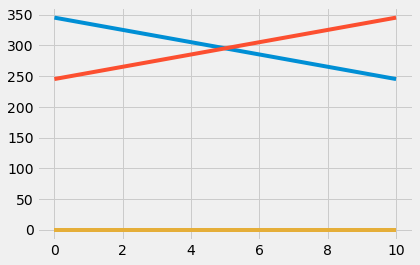

In [39]:
x = np.linspace(0, 10)


plt.plot(x, Py_function(x, 10, 100, 50, 9.81))
plt.plot(x, Ry_function(x, 10, 100, 50, 9.81))
plt.plot(x, 0*x)

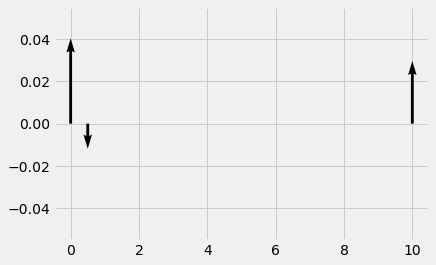

In [51]:
plt.quiver([0, 0.5, 10], 
           [0, 0, 0], 
           [0, 0, 0],
           [Py_function(0.5, 10, 100, 50, 9.81),-100, Ry_function(0.5, 10, 100, 50, 9.81)], 
          scale = 1500)